## Implementing Gradient Descent Using Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot

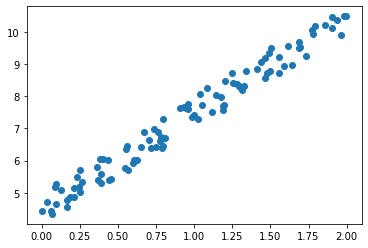

In [8]:
# generate random data
def generate_random_data(m = 100):
    X = 2 * np.random.rand(m, 1)
    y = 4 + 3 * X + np.random.rand(m, 1)
    return X, y

X, y = generate_random_data()
pyplot.scatter(X, y)

## Define Linear and loss function

As it is a linear regression. The predict function is simply:

$
y = m*x + b
$

The squared error is the mean of squared error:
$
err = \frac{1}{n}\sum_{k=1}{(\hat{y}_k - y_k)^2}
$

In [36]:
def predict(X):
    y = m * X + b
    return y

def squared_error(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))


# initialise m and b, in this case as X has only one feature, m and b are both scalar. 
m = tf.Variable(0., name = "m")  
b = tf.Variable(0., name = "b") 

squared_error(predict(X), y)

<tf.Tensor: shape=(), dtype=float32, numpy=56.926945>

## Gradient Descent

In TensorFlow 2.0. We can calculate gradient for every variable. To o this is to create a gradient tape object, and passing the functions.

Gradient can be calculated by passing in what's required, then the variable data. 

As we get gradient then we can easily use them to modify m and b with learning rate. This meant we don't have to calculate gradient ourselves.

In [32]:
n_epochs = 1000
learning_rate = 0.01

for epoch in range(n_epochs):                
    with tf.GradientTape(persistent=True) as tape:
      y_pred = predict(X)          
      loss = squared_error(y_pred, y)

    # gradient is calculated for every variable
    grad = tape.gradient(loss, [m, b])   

    # here we have to use assign
    m.assign(m - learning_rate * grad[0])
    b.assign(b - learning_rate * grad[1])

    if (epoch % 200 == 0):
     print(loss)

print(m, b)

tf.Tensor(56.926945, shape=(), dtype=float32)
tf.Tensor(0.16585195, shape=(), dtype=float32)
tf.Tensor(0.10934556, shape=(), dtype=float32)
tf.Tensor(0.09327527, shape=(), dtype=float32)
tf.Tensor(0.08870453, shape=(), dtype=float32)
<tf.Variable 'm:0' shape=() dtype=float32, numpy=3.0644858> <tf.Variable 'b:0' shape=() dtype=float32, numpy=4.42102>


## Auto Diff

Tensorflow also provide optimizers which essentially does the above with minimal effort.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In TF 2.0. I can only find optimizers under keras.

In [53]:
# Create an optimizer with the desired parameters.
m = tf.Variable(100.)
b = tf.Variable(4.)
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.1)
loss = lambda: squared_error(predict(X), y)
opt_op = opt.minimize(loss, var_list=[m, b])
opt.minimize(loss, var_list=[m, b])
print(m, b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=99.502815> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.615815>
